In [1]:
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
actors = Table.read_table(path_data + 'actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


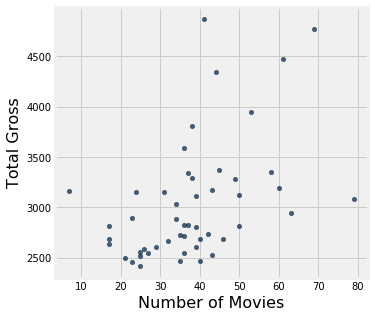

In [2]:
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
actors.scatter('Number of Movies', 'Total Gross')

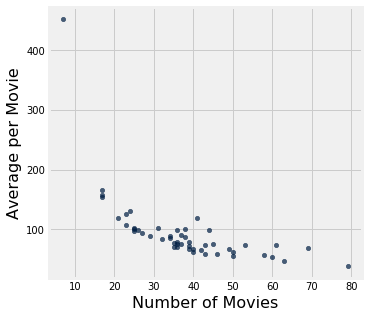

In [3]:
actors.scatter('Number of Movies', 'Average per Movie')

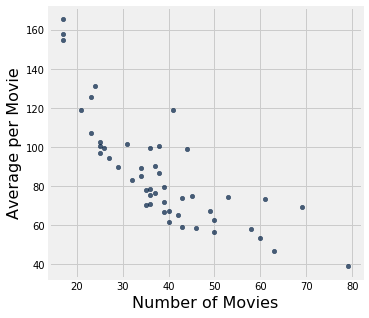

In [4]:
no_outlier = actors.where('Number of Movies', are.above(10))
no_outlier.scatter('Number of Movies', 'Average per Movie')

In [5]:
actors.where('Number of Movies', are.above(60))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Robert DeNiro,3081.3,79,39,Meet the Fockers,279.3
Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


In [6]:
actors.where('Number of Movies', are.below(10))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [7]:
movies_by_year = Table.read_table(path_data + 'movies_by_year.csv')
movies_by_year

Year,Total Gross,Number of Movies,#1 Movie
2015,11128.5,702,Star Wars: The Force Awakens
2014,10360.8,702,American Sniper
2013,10923.6,688,Catching Fire
2012,10837.4,667,The Avengers
2011,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,10565.6,536,Toy Story 3
2009,10595.5,521,Avatar
2008,9630.7,608,The Dark Knight
2007,9663.8,631,Spider-Man 3
2006,9209.5,608,Dead Man's Chest


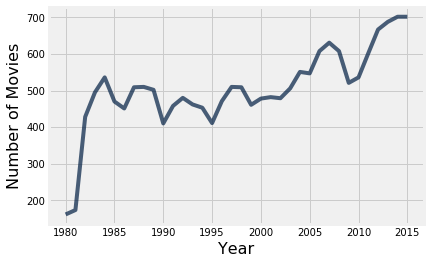

In [8]:
movies_by_year.plot('Year', 'Number of Movies')

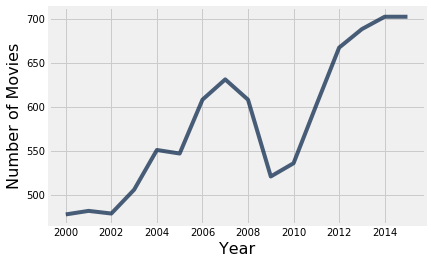

In [9]:
century_21 = movies_by_year.where('Year', are.above(1999))
century_21.plot('Year', 'Number of Movies')

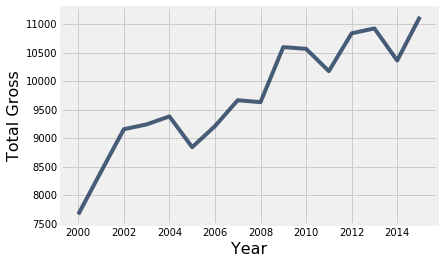

In [10]:
century_21.plot('Year', 'Total Gross')

In [11]:
century_21.where('Year', are.equal_to(2009))

Year,Total Gross,Number of Movies,#1 Movie
2009,10595.5,521,Avatar


In [12]:
top = Table.read_table(path_data + 'top_movies.csv')
# Make the numbers in the Gross and Gross
# (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [13]:
movies_and_studios = top.select('Title', 'Studio')
movies_and_studios.group('Studio')

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


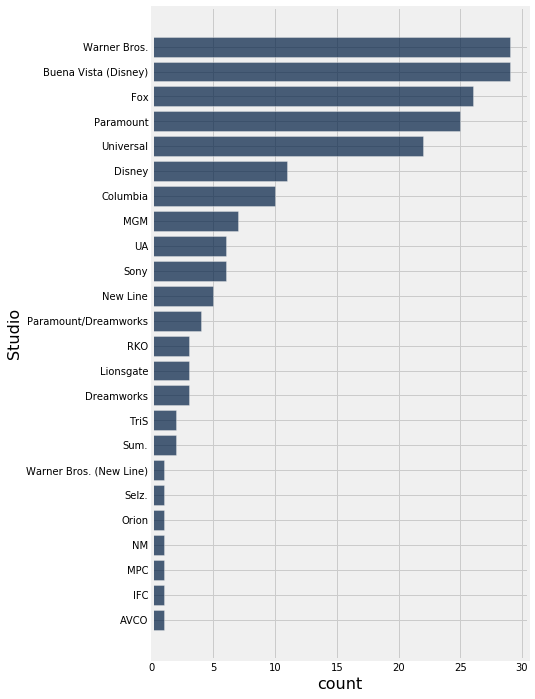

In [14]:
studio_distribution = movies_and_studios.group('Studio')
studio_distribution.sort('count', descending=True).barh('Studio')

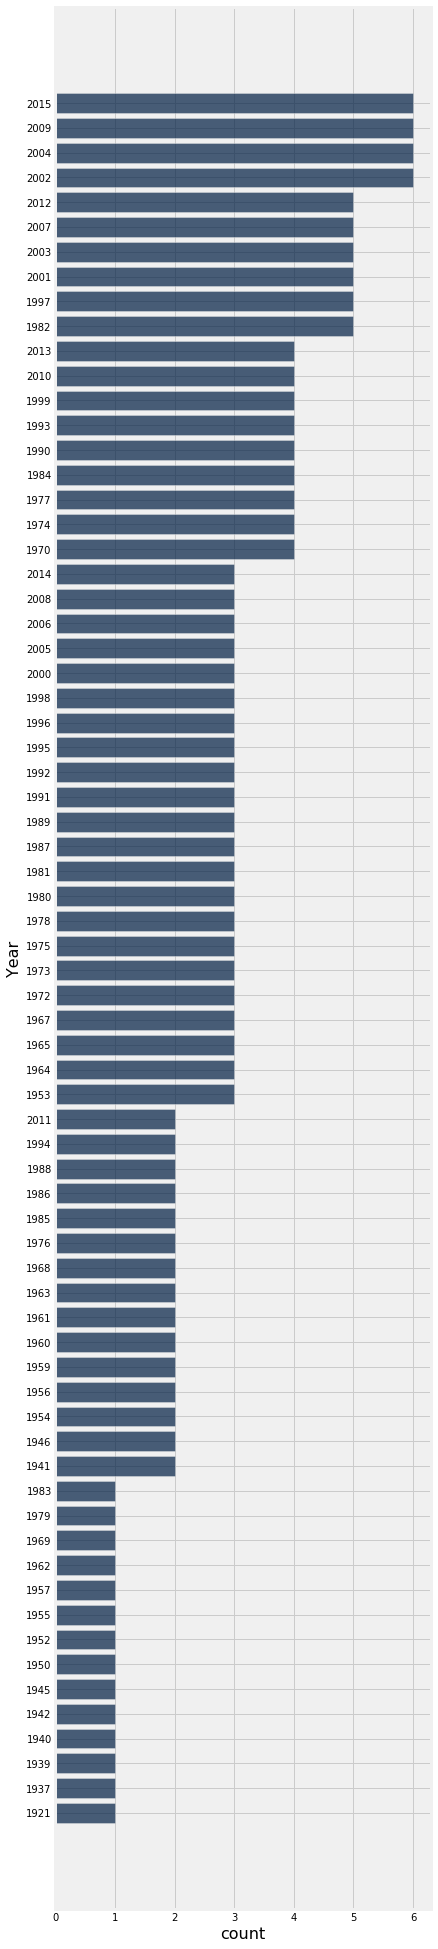

In [15]:
movies_and_years = top.select('Title', 'Year')
movies_and_years.group('Year').sort('count', descending=True).barh('Year')

In [16]:
import numpy as np
millions = top.select(0).with_column('Adjusted Gross', 
                      np.round(top.column(3)/1e6, 2))
millions

Title,Adjusted Gross
Star Wars: The Force Awakens,906.72
Avatar,846.12
Titanic,1178.63
Jurassic World,687.73
Marvel's The Avengers,668.87
The Dark Knight,647.76
Star Wars: Episode I - The Phantom Menace,785.72
Star Wars,1549.64
Avengers: Age of Ultron,465.68
The Dark Knight Rises,500.96


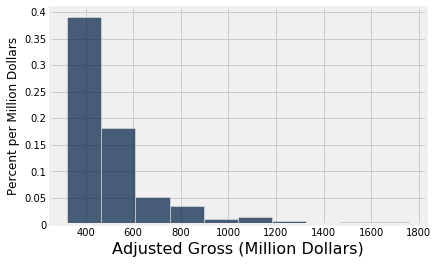

In [17]:
millions.hist('Adjusted Gross', unit="Million Dollars")

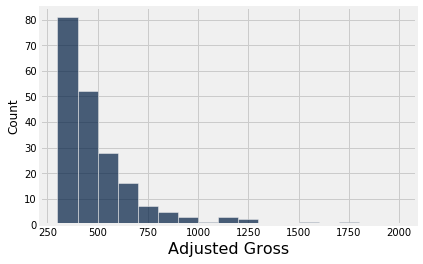

In [18]:
millions.hist('Adjusted Gross', 
  bins=np.arange(300,2001,100), normed=False)

In [19]:
heights = Table.read_table(path_data + 'galton_subset.csv')
heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


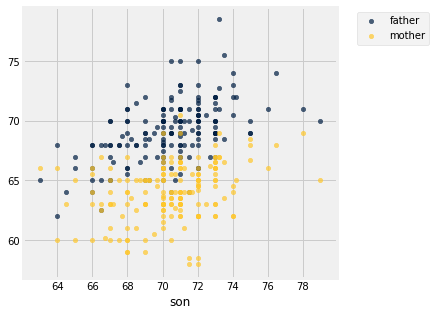

In [20]:
heights.scatter('son')

In [21]:
usa_ca = Table.read_table(path_data + 'usa_ca_2014.csv')
usa_ca

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


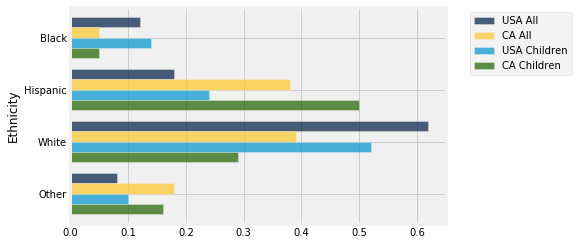

In [22]:
usa_ca.barh('Ethnicity')

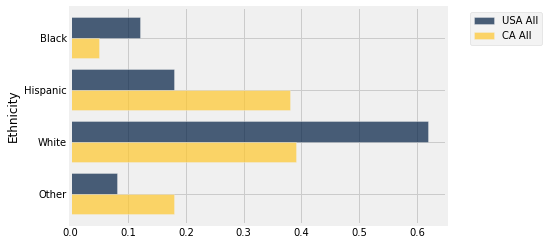

In [23]:
usa_ca.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')

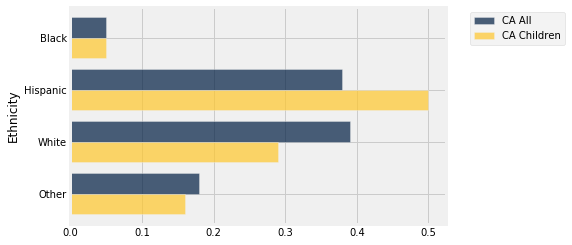

In [24]:
usa_ca.select('Ethnicity', 'CA All', 'CA Children').barh('Ethnicity')